<a href="https://colab.research.google.com/github/kinghoon/Cough-Analyzer/blob/main/%EC%8B%A4%ED%97%98%EC%8B%A42.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 18.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

# 2.CRNN

Data shape: (3751, 20, 431)
Class labels: ['4', '2', '3', '1']
Class distribution: {'4': 726, '2': 1537, '3': 1194, '1': 294}


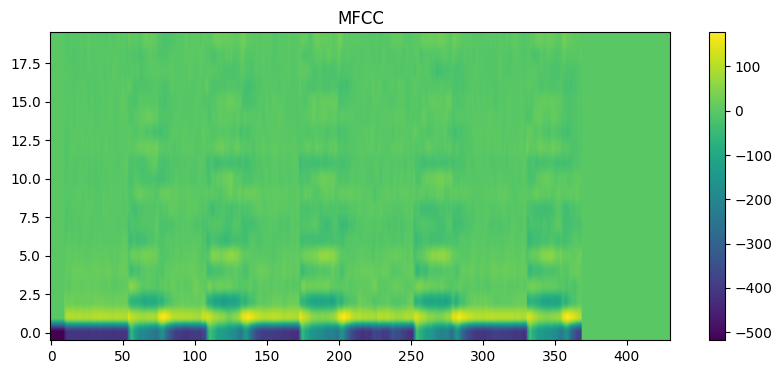

Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.4513 - loss: 1.1937 - val_accuracy: 0.7048 - val_loss: 0.7045
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7186 - loss: 0.6734 - val_accuracy: 0.7926 - val_loss: 0.4931
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.8005 - loss: 0.4925 - val_accuracy: 0.8484 - val_loss: 0.3538
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.8237 - loss: 0.4113 - val_accuracy: 0.8590 - val_loss: 0.3009
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.8653 - loss: 0.3280 - val_accuracy: 0.8777 - val_loss: 0.3119
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.8859 - loss: 0.2763 - val_accuracy: 0.8564 - val_loss: 0.3202
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9000 - loss: 0.2403 - val_accuracy: 0.8989 - val_loss: 0.2500
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9247 - loss: 0.2174 - val_accu

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 여러 개의 데이터 디렉토리
data_dirs = [
 '/content/drive/MyDrive/Colab Notebooks/voicedata/DISTINCT',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/add_noise',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/change_speed',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/pitch_shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/time_stretch',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid4',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc)

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터 시각화
plt.figure(figsize=(10, 4))
plt.imshow(X[0].squeeze(), aspect='auto', origin='lower')
plt.title('MFCC')
plt.colorbar()
plt.show()

# 데이터 크기 확인 및 조정
X = np.expand_dims(X, axis=-1)  # CNN은 4D 텐서를 입력으로 필요로 하므로 차원 추가

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# CRNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(n_mfcc, fixed_sequence_length, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Reshape((fixed_sequence_length // 8, (n_mfcc // 8) * 128)),  # CNN의 출력을 RNN의 입력으로 재구성
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.Bidirectional(layers.GRU(128)),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels_unique), activation='softmax')
])
# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/0616_standsacaler(4231).keras')


# 2트

Data shape: (3630, 20, 431)
Class labels: ['1', '3', '2', '4']
Class distribution: {'1': 294, '3': 1146, '2': 1464, '4': 726}


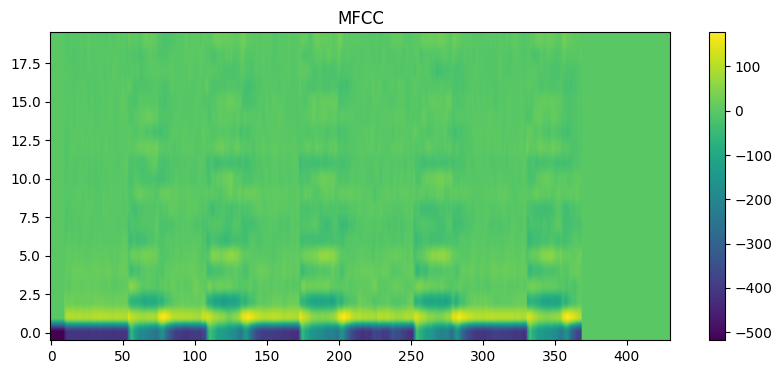

Epoch 1/20
91/91 [==============================] - 130s 1s/step - loss: 0.7674 - accuracy: 0.6808 - val_loss: 1.7612 - val_accuracy: 0.4780
Epoch 2/20
91/91 [==============================] - 116s 1s/step - loss: 0.4189 - accuracy: 0.8382 - val_loss: 0.6442 - val_accuracy: 0.7493
Epoch 3/20
91/91 [==============================] - 112s 1s/step - loss: 0.3517 - accuracy: 0.8595 - val_loss: 0.5193 - val_accuracy: 0.7906
Epoch 4/20
91/91 [==============================] - 113s 1s/step - loss: 0.2574 - accuracy: 0.9022 - val_loss: 0.3024 - val_accuracy: 0.8636
Epoch 5/20
91/91 [==============================] - 116s 1s/step - loss: 0.2273 - accuracy: 0.9112 - val_loss: 0.2134 - val_accuracy: 0.9132
Epoch 6/20
91/91 [==============================] - 114s 1s/step - loss: 0.1678 - accuracy: 0.9346 - val_loss: 0.1914 - val_accuracy: 0.9325
Epoch 7/20
91/91 [==============================] - 119s 1s/step - loss: 0.1269 - accuracy: 0.9556 - val_loss: 0.2072 - val_accuracy: 0.9201
Epoch 8/20
91

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DISTINCT',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/add_noise',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/change_speed',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/pitch_shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/time_stretch',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid4',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc)

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터 시각화
plt.figure(figsize=(10, 4))
plt.imshow(X[0].squeeze(), aspect='auto', origin='lower')
plt.title('MFCC')
plt.colorbar()
plt.show()

# 데이터 크기 확인 및 조정
X = np.expand_dims(X, axis=-1)  # CNN은 4D 텐서를 입력으로 필요로 하므로 차원 추가

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CRNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(n_mfcc, fixed_sequence_length, 1)),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Reshape((fixed_sequence_length // 8, (n_mfcc // 8) * 128)),  # CNN의 출력을 RNN의 입력으로 재구성
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.Bidirectional(layers.GRU(128)),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels_unique), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 학습 후 모델 저장
# model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/0613_analyzer_crnn.keras')


# 모델저장

In [ ]:
# 학습 후 모델 저장
model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/0615_DISTINCT1324(2).keras')

# 단일 예측

In [ ]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# 예측을 위한 새 오디오 파일 경로
new_audio_file = '/content/drive/MyDrive/Colab Notebooks/voicedata/지인기침/record5 (4).wav'

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 새 오디오 파일 로드 및 MFCC 변환
def extract_mfcc(file_path, sr=22050, duration=10):
    audio, _ = librosa.load(file_path, sr=sr, duration=duration)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

    # MFCC 시퀀스 길이를 고정된 길이로 맞추기
    if mfcc.shape[1] < fixed_sequence_length:
        pad_width = fixed_sequence_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :fixed_sequence_length]

    return mfcc

# 예측 함수
def predict(model, file_path, class_labels):
    mfcc = extract_mfcc(file_path, sr=sr, duration=duration)
    X = np.expand_dims(mfcc, axis=-1)
    X = np.expand_dims(X, axis=0)  # 배치 차원 추가

    predictions = model.predict(X)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_probabilities = predictions[0]

    return predicted_class[0], predicted_probabilities

# # 저장된 모델 로드
model = load_model('/content/drive/MyDrive/Colab Notebooks/saved_model/0616_standsacaler(4231).keras')

# 클래스 레이블 정의
class_labels = ['heart failure', 'asthma', 'COVID-19', 'healthy']  # 실제 클래스 레이블을 여기에 입력하세요

# 예측 수행
predicted_class, predicted_probabilities = predict(model, new_audio_file, class_labels)

# 예측 결과 출력
print(f'Predicted class: {class_labels[predicted_class]}')
for i, prob in enumerate(predicted_probabilities):
    print(f'{class_labels[i]}: {prob:.2f}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: COVID-19
heart failure: 0.00
asthma: 0.24
COVID-19: 0.75
healthy: 0.00


In [ ]:
load_model('/content/drive/MyDrive/Colab Notebooks/saved_model/0610_analyzer.keras').summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 20, 431, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 10, 215, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 215, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 107, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 107, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 53, 128)       

# 예측결과 통계

In [ ]:
import os
import numpy as np
import librosa
from tensorflow.keras.models import load_model

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 새 오디오 파일 로드 및 MFCC 변환
def extract_mfcc(file_path, sr=22050, duration=10):
    audio, _ = librosa.load(file_path, sr=sr, duration=duration)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

    # MFCC 시퀀스 길이를 고정된 길이로 맞추기
    if mfcc.shape[1] < fixed_sequence_length:
        pad_width = fixed_sequence_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :fixed_sequence_length]

    return mfcc

# 예측 함수
def predict(model, file_path, class_labels):
    mfcc = extract_mfcc(file_path, sr=sr, duration=duration)
    X = np.expand_dims(mfcc, axis=-1)
    X = np.expand_dims(X, axis=0)  # 배치 차원 추가

    predictions = model.predict(X)
    predicted_class = np.argmax(predictions, axis=1)
    predicted_probabilities = predictions[0]

    return predicted_class[0], predicted_probabilities

# 디렉토리의 모든 파일에 대해 예측 수행
def predict_directory(model, directory, class_labels):
    files = [file for file in os.listdir(directory) if file.endswith('.wav')]
    total_files = len(files)
    results = []
    class_counts = {label: 0 for label in class_labels}
    class_probabilities = {label: [] for label in class_labels}

    for idx, file_name in enumerate(files):
        file_path = os.path.join(directory, file_name)
        predicted_class, predicted_probabilities = predict(model, file_path, class_labels)
        results.append((file_name, predicted_class, predicted_probabilities))

        # 예측 결과 저장
        class_label = class_labels[predicted_class]
        class_counts[class_label] += 1
        for i, label in enumerate(class_labels):
            class_probabilities[label].append(predicted_probabilities[i])

        # 예측 결과 출력
        print(f'1/1 [==============================] - 0s')
        print(f'File: {file_name}')
        print(f'Predicted label: {class_label}')
        print(f'Predictions: {predicted_probabilities}')
        print('---')

    return results, class_counts, class_probabilities

# 통계 출력 함수
def print_statistics(class_counts, class_probabilities):
    total_predictions = sum(class_counts.values())
    print('\nPrediction Statistics:')
    for label in class_counts:
        percentage = (class_counts[label] / total_predictions) * 100
        print(f'{label}: {class_counts[label]} ({percentage:.2f}%)')

# 저장된 모델 로드
model = load_model('/content/drive/MyDrive/Colab Notebooks/saved_model/0613_analyzer_crnn.keras')

# 클래스 레이블 정의
class_labels = ['정상', 'others', '심부전', '천식']  # 실제 클래스 라벨을 여기에 입력하세요

# 예측을 위한 디렉토리 경로
predict_directory_path = '/content/drive/MyDrive/Colab Notebooks/voicedata/지인기침'

# 디렉토리 내 모든 파일에 대해 예측 수행
predictions, class_counts, class_probabilities = predict_directory(model, predict_directory_path, class_labels)

# 전체 통계 출력
print_statistics(class_counts, class_probabilities)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
1/1 [==============================] - 0s
File: mj.wav
Predicted label: others
Predictions: [7.0887814e-05 9.9660009e-01 3.2193998e-03 1.0960028e-04]
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 [==============================] - 0s
File: sj.wav
Predicted label: 정상
Predictions: [9.7580308e-01 1.2310686e-02 1.1336495e-02 5.4974965e-04]
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 [==============================] - 0s
File: kh.wav
Predicted label: others
Predictions: [4.0098064e-05 9.6325672e-01 3.6683347e-02 1.9817504e-05]
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 [==============================] - 0s
File: jw.wav
Predicted label: others
Predictions: [0.00350466 0.92058134 0.07487814 0.00103582]
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 [==============================] - 0s
File: jh.wav
Predicted label: others
Predictions: [8.8648354e-05 9.7075808e-01 2.9007038e-02 1.4624956e-04]
---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 [===========

In [ ]:
import os
import numpy as np
import librosa
from tensorflow.keras.models import load_model

# 새로운 데이터 디렉토리 경로
new_data_dir = '/content/drive/MyDrive/Colab Notebooks/voicedata/지인기침'

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 모델 불러오기
model_path = '/content/drive/MyDrive/Colab Notebooks/saved_model/0618_batchmax(2341).keras'
model = load_model(model_path)

# 클래스 레이블
class_labels_unique = ['천식', '심부전', '정상', 'others']

# 새로운 데이터를 로드하고 MFCC로 변환하는 함수
def process_new_data(file_path, sr=22050):
    try:
        audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

    # MFCC 시퀀스 길이를 고정된 길이로 맞추기
    if (pad_width := fixed_sequence_length - mfcc.shape[1]) > 0:
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :fixed_sequence_length]

    return np.expand_dims(mfcc, axis=-1)

# 디렉토리 내의 모든 파일에 대해 예측 수행
def predict_from_directory(data_dir):
    predictions = []
    for file_name in os.listdir(data_dir):
        file_path = os.path.join(data_dir, file_name)
        if os.path.isfile(file_path) and file_path.endswith('.wav'):
            mfcc = process_new_data(file_path, sr=sr)
            if mfcc is not None:
                mfcc = np.expand_dims(mfcc, axis=0)  # 배치 차원 추가
                prediction = model.predict(mfcc)
                predicted_class = class_labels_unique[np.argmax(prediction)]
                predictions.append((file_name, predicted_class))
                print(f"File: {file_name}, Predicted class: {predicted_class}")
    return predictions

# 예측 수행
predictions = predict_from_directory(new_data_dir)


TypeError: <class 'keras.src.models.sequential.Sequential'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras', 'class_name': 'Sequential', 'config': {'name': 'sequential', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 20, 431, 1], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_input'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 20, 431, 1], 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 20, 431, 1]}}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 20, 431, 32]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 20, 431, 32]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.3, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 10, 215, 32]}}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'dtype': 'float32', 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 10, 215, 32]}}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_1', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 10, 215, 64]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 10, 215, 64]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_1', 'trainable': True, 'dtype': 'float32', 'rate': 0.3, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 5, 107, 64]}}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_2', 'trainable': True, 'dtype': 'float32', 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 5, 107, 64]}}, {'module': 'keras.layers', 'class_name': 'BatchNormalization', 'config': {'name': 'batch_normalization_2', 'trainable': True, 'dtype': 'float32', 'axis': [3], 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'moving_mean_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'moving_variance_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'registered_name': None}, 'beta_regularizer': None, 'gamma_regularizer': None, 'beta_constraint': None, 'gamma_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 5, 107, 128]}}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_2', 'trainable': True, 'dtype': 'float32', 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'build_config': {'input_shape': [None, 5, 107, 128]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_2', 'trainable': True, 'dtype': 'float32', 'rate': 0.3, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 2, 53, 128]}}, {'module': 'keras.layers', 'class_name': 'Reshape', 'config': {'name': 'reshape', 'trainable': True, 'dtype': 'float32', 'target_shape': [53, 256]}, 'registered_name': None, 'build_config': {'input_shape': [None, 2, 53, 128]}}, {'module': 'keras.layers', 'class_name': 'Bidirectional', 'config': {'name': 'bidirectional', 'trainable': True, 'dtype': 'float32', 'layer': {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'gru', 'trainable': True, 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None, 'shared_object_id': 140228285488656}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}, 'registered_name': None, 'shared_object_id': 140228285495808}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None, 'shared_object_id': 140228285493696}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 2, 'reset_after': True}, 'registered_name': None}, 'merge_mode': 'concat'}, 'registered_name': None, 'build_config': {'input_shape': [None, 53, 256]}}, {'module': 'keras.layers', 'class_name': 'Bidirectional', 'config': {'name': 'bidirectional_1', 'trainable': True, 'dtype': 'float32', 'layer': {'module': 'keras.layers', 'class_name': 'GRU', 'config': {'name': 'gru_1', 'trainable': True, 'dtype': 'float32', 'return_sequences': False, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 128, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None, 'shared_object_id': 140228277715824}, 'recurrent_initializer': {'module': 'keras.initializers', 'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}, 'registered_name': None, 'shared_object_id': 140228277730608}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None, 'shared_object_id': 140228277728688}, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropout': 0.0, 'recurrent_dropout': 0.0, 'implementation': 2, 'reset_after': True}, 'registered_name': None}, 'merge_mode': 'concat'}, 'registered_name': None, 'build_config': {'input_shape': [None, 53, 256]}}, {'module': 'keras.layers', 'class_name': 'Dropout', 'config': {'name': 'dropout_3', 'trainable': True, 'dtype': 'float32', 'rate': 0.5, 'noise_shape': None, 'seed': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 4, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}}]}, 'registered_name': None, 'build_config': {'input_shape': [None, 20, 431, 1]}, 'compile_config': {'optimizer': 'adam', 'loss': 'sparse_categorical_crossentropy', 'metrics': ['accuracy'], 'loss_weights': None, 'weighted_metrics': None, 'run_eagerly': None, 'steps_per_execution': None, 'jit_compile': None}}.

Exception encountered: <class 'keras.src.layers.convolutional.conv2d.Conv2D'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 20, 431, 1], 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 20, 431, 1]}}.

Exception encountered: Error when deserializing class 'Conv2D' using config={'name': 'conv2d', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': [None, 20, 431, 1], 'filters': 32, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}.

Exception encountered: Unrecognized keyword arguments passed to Conv2D: {'batch_input_shape': [None, 20, 431, 1]}

In [ ]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import numpy as np
import librosa
import tensorflow as tf

# 모델 로드
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/saved_model/0613_analyzer_crnn.keras')

# 단일 오디오 파일을 로드하고 예측하는 함수
def predict_single_audio(file_path, model, sr=22050, n_mfcc=20, n_fft=2048, hop_length=512, duration=10, fixed_sequence_length=431):
    try:
        audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

    # MFCC 시퀀스 길이를 고정된 길이로 맞추기
    if mfcc.shape[1] < fixed_sequence_length:
        pad_width = fixed_sequence_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :fixed_sequence_length]

    mfcc = np.expand_dims(mfcc, axis=-1)  # CNN은 4D 텐서를 입력으로 필요로 하므로 차원 추가
    mfcc = np.expand_dims(mfcc, axis=0)  # 배치 차원 추가

    # 예측 수행
    predictions = model.predict(mfcc)

    return predictions

# 파일 경로
file_path = '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy5/2(1040).wav'

# 예측 수행
predictions = predict_single_audio(file_path, model)

if predictions is not None:
    # 각 클래스에 대한 예측 확률 출력
    for i, class_label in enumerate(class_labels_unique):
        print(f"{class_label}: {predictions[0][i] * 100:.2f}%")

    # 가장 높은 확률을 가진 클래스 출력
    predicted_class = class_labels_unique[np.argmax(predictions[0])]
    print(f"Predicted class: {predicted_class}")
else:
    print("Prediction failed.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
4: 0.00%
2: 99.82%
3: 0.16%
1: 0.02%
Predicted class: 2


Data shape: (2939, 20, 431)
Class labels: ['1', '4', '3', '2']
Class distribution: {'1': 770, '4': 732, '3': 638, '2': 799}


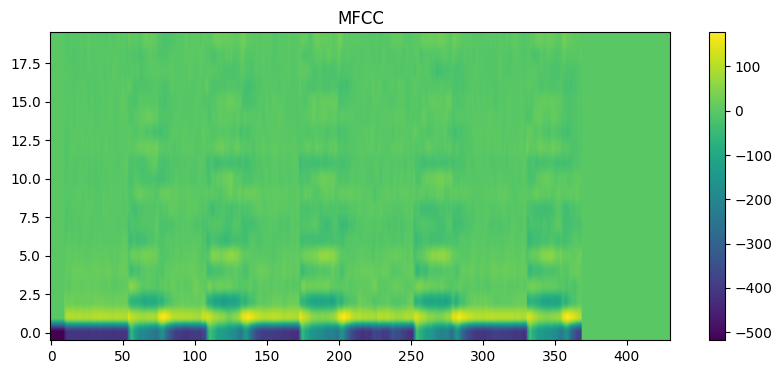

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.6338 - loss: 0.9226 - val_accuracy: 0.3690 - val_loss: 1.4090
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8038 - loss: 0.4989 - val_accuracy: 0.6054 - val_loss: 0.8144
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.8640 - loss: 0.3405 - val_accuracy: 0.7653 - val_loss: 0.5723
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.8688 - loss: 0.3386 - val_accuracy: 0.8282 - val_loss: 0.4167
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.9216 - loss: 0.2090 - val_accuracy: 0.9014 - val_loss: 0.2624
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.9232 - loss: 0.2167 - val_accuracy: 0.8503 - val_loss: 0.3701
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.9287 - loss: 0.1813 - val_accuracy: 0.9048 - val_loss: 0.2234
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 76s 988ms/step - accuracy: 0.9442 - loss: 0.1546 - val_accuracy: 0.9048 - val_l

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/wav',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/augmentation/4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/augmentation/1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc)

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터 시각화
plt.figure(figsize=(10, 4))
plt.imshow(X[0].squeeze(), aspect='auto', origin='lower')
plt.title('MFCC')
plt.colorbar()
plt.show()

# 데이터 크기 확인 및 조정
X = np.expand_dims(X, axis=-1)  # CNN은 4D 텐서를 입력으로 필요로 하므로 차원 추가

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CRNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(n_mfcc, fixed_sequence_length, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),  # Global Average Pooling 2D 사용
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels_unique), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 학습 후 모델 저장
# model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/0610_analyzer_crnn.keras')


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/0612_avg_model.keras')

# LAST 모델

Data shape: (3751, 20, 431)
Class labels: ['3', '1', '2', '4']
Class distribution: {'3': 1194, '1': 294, '2': 1537, '4': 726}


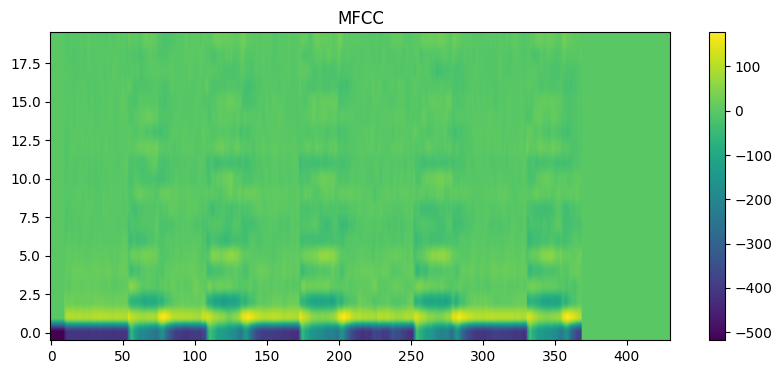

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.5317 - loss: 1.1259 - val_accuracy: 0.5992 - val_loss: 1.0130
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.8056 - loss: 0.4895 - val_accuracy: 0.8043 - val_loss: 0.4791
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.8645 - loss: 0.3505 - val_accuracy: 0.8575 - val_loss: 0.3660
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.8738 - loss: 0.2937 - val_accuracy: 0.8748 - val_loss: 0.3016
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8763 - loss: 0.2995 - val_accuracy: 0.8988 - val_loss: 0.2458
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9219 - loss: 0.1942 - val_accuracy: 0.9228 - val_loss: 0.1991
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9337 - loss: 0.1763 - val_accuracy: 0.9334 - val_loss: 0.1917
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9576 - loss: 0.1141 - val_accuracy: 0.9334 - v

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DISTINCT',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/add_noise',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/change_speed',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/pitch_shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/time_stretch',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid4',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc)

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터 시각화
plt.figure(figsize=(10, 4))
plt.imshow(X[0].squeeze(), aspect='auto', origin='lower')
plt.title('MFCC')
plt.colorbar()
plt.show()

# 데이터 크기 확인 및 조정
X = np.expand_dims(X, axis=-1)  # CNN은 4D 텐서를 입력으로 필요로 하므로 차원 추가

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CRNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(n_mfcc, fixed_sequence_length, 1)),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Reshape((fixed_sequence_length // 8, (n_mfcc // 8) * 128)),  # CNN의 출력을 RNN의 입력으로 재구성
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.Bidirectional(layers.GRU(128)),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels_unique), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 학습 후 모델 저장
# model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/0613_analyzer_crnn.keras')


In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/wav',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/augmentation/4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/augmentation/1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc)

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환 및 정렬
    class_labels_unique = sorted(list(set(class_labels)), key=int)
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터 시각화
plt.figure(figsize=(10, 4))
plt.imshow(X[0].squeeze(), aspect='auto', origin='lower')
plt.title('MFCC')
plt.colorbar()
plt.show()

# 데이터 크기 확인 및 조정
X = np.expand_dims(X, axis=-1)  # CNN은 4D 텐서를 입력으로 필요로 하므로 차원 추가

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CRNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(n_mfcc, fixed_sequence_length, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),  # Global Average Pooling 2D 사용
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels_unique), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 학습 후 모델 저장
# model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/0610_analyzer_crnn.keras')


Data shape: (3491, 20, 431)
Class labels: ['1', '4', '3', '2']
Class distribution: {'1': 770, '4': 732, '3': 638, '2': 1351}


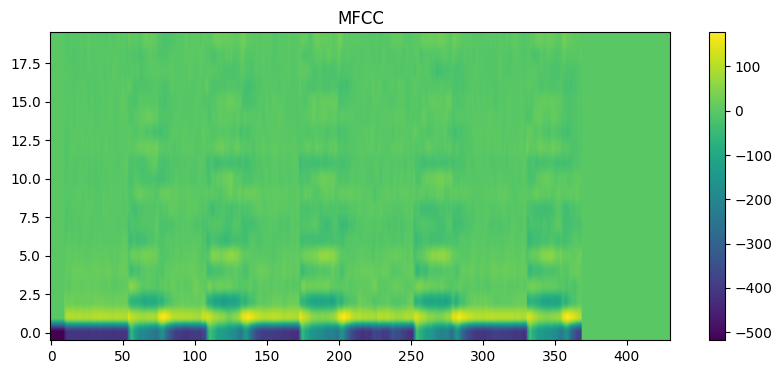

Epoch 1/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.4791 - loss: 1.1914 - val_accuracy: 0.7668 - val_loss: 0.6263
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.7711 - loss: 0.6147 - val_accuracy: 0.8426 - val_loss: 0.4347
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8475 - loss: 0.4405 - val_accuracy: 0.8813 - val_loss: 0.3347
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.8936 - loss: 0.3004 - val_accuracy: 0.8469 - val_loss: 0.3804
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.8798 - loss: 0.3126 - val_accuracy: 0.8970 - val_loss: 0.2562
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9204 - loss: 0.2026 - val_accuracy: 0.9385 - val_loss: 0.1624
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.9281 - loss: 0.1833 - val_accuracy: 0.8999 - val_loss: 0.2808
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.9460 - loss: 0.1421 - val_accuracy: 0.9385 - v

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/wav',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/augmentation/4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/augmentation/1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc)

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터 시각화
plt.figure(figsize=(10, 4))
plt.imshow(X[0].squeeze(), aspect='auto', origin='lower')
plt.title('MFCC')
plt.colorbar()
plt.show()

# 데이터 크기 확인 및 조정
X = np.expand_dims(X, axis=-1)  # CNN은 4D 텐서를 입력으로 필요로 하므로 차원 추가

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CRNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(n_mfcc, fixed_sequence_length, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Reshape((fixed_sequence_length // 8, (n_mfcc // 8) * 128)),  # CNN의 출력을 RNN의 입력으로 재구성
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.Bidirectional(layers.GRU(128)),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels_unique), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 학습 후 모델 저장
# model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/0610_analyzer_crnn.keras')


# 3. Transformer 기반 모델

In [ ]:
import os
import numpy as np
import librosa
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/wav',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/augmentation/4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/augmentation/1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환한 후 파일로 저장하는 함수
def save_mfcc(data_dirs, sr=22050, save_dir='/content/drive/MyDrive/Colab Notebooks/voicedata/MFCC'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

                # MFCC 데이터를 저장
                np.save(os.path.join(save_dir, file_name.replace('.wav', '.npy')), mfcc)

    # 클래스 레이블 저장
    class_labels_unique = list(set(class_labels))
    np.save(os.path.join(save_dir, 'class_labels.npy'), class_labels_unique)
    np.save(os.path.join(save_dir, 'class_indices.npy'), np.array([class_labels_unique.index(lbl) for lbl in class_labels]))

save_mfcc(data_dirs)


In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/wav',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/augmentation/4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/augmentation/1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc)

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터 시각화
plt.figure(figsize=(10, 4))
plt.imshow(X[0].squeeze(), aspect='auto', origin='lower')
plt.title('MFCC')
plt.colorbar()
plt.show()

# 데이터 크기 확인 및 조정
X = np.expand_dims(X, axis=-1)  # CNN은 4D 텐서를 입력으로 필요로 하므로 차원 추가

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CRNN 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(n_mfcc, fixed_sequence_length, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Reshape((fixed_sequence_length // 8, (n_mfcc // 8) * 128)),  # CNN의 출력을 RNN의 입력으로 재구성
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.Bidirectional(layers.GRU(128)),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels_unique), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 학습 후 모델 저장
# model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/0610_analyzer_crnn.keras')


# 5.코로나 이진분류

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import InputLayer

# 경고 메시지 억제
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터 디렉토리
new_data_dir = '/content/drive/MyDrive/Colab Notebooks/voicedata/covid5/3(1005).wav'

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_and_preprocess_audio(file_path, sr=22050, duration=10):
    try:
        audio, _ = librosa.load(file_path, sr=sr, duration=duration)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

    if mfcc.shape[1] < fixed_sequence_length:
        pad_width = fixed_sequence_length - mfcc.shape[1]
        mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
    else:
        mfcc = mfcc[:, :fixed_sequence_length]

    return mfcc

# 새로운 오디오 파일 예측 함수
def predict_new_audio(model, new_data_dir):
    predictions = []
    for file_name in os.listdir(new_data_dir):
        file_path = os.path.join(new_data_dir, file_name)
        if os.path.isfile(file_path) and file_path.endswith('.wav'):
            mfcc = load_and_preprocess_audio(file_path, sr=sr, duration=duration)
            if mfcc is not None:
                mfcc = np.expand_dims(mfcc, axis=-1)  # CNN 입력 형태로 맞추기
                mfcc = np.expand_dims(mfcc, axis=0)  # 배치 차원 추가
                prediction = model.predict(mfcc)
                predicted_label = np.argmax(prediction, axis=1)
                predictions.append((file_name, predicted_label[0]))
    return predictions

# 모델 로드
model_path = '/content/drive/MyDrive/Colab Notebooks/saved_model/0612_avg_model.keras'
model = load_model(model_path, custom_objects={'InputLayer': InputLayer})

# 새로운 데이터에 대한 예측 수행
predictions = predict_new_audio(model, new_data_dir)

# 예측 결과 출력
for file_name, predicted_label in predictions:
    print(f"File: {file_name}, Predicted Class: {predicted_label}")


NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/Colab Notebooks/voicedata/covid5/3(1005).wav'

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/')

# 시드 설정

Data shape: (3671, 20, 431)
Class labels: ['4', '3', '2', '1']
Class distribution: {'4': 726, '3': 1194, '2': 1261, '1': 490}


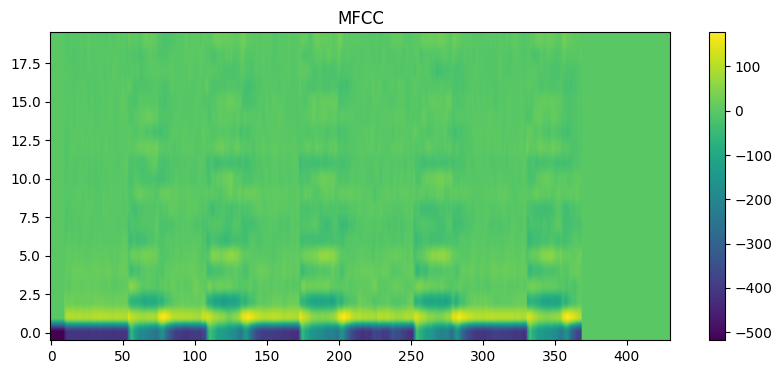

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import random
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 시드 설정
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DISTINCT',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/augmented(1)',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/add_noise',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/change_speed',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/pitch_shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/time_stretch',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid4',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc)

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터 시각화
plt.figure(figsize=(10, 4))
plt.imshow(X[0].squeeze(), aspect='auto', origin='lower')
plt.title('MFCC')
plt.colorbar()
plt.show()

# 데이터 크기 확인 및 조정
X = np.expand_dims(X, axis=-1)  # CNN은 4D 텐서를 입력으로 필요로 하므로 차원 추가

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)




In [ ]:
# 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(n_mfcc, fixed_sequence_length, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Reshape((fixed_sequence_length // 8, (n_mfcc // 8) * 128)),
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.Bidirectional(layers.GRU(128)),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels_unique), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# model.save('/content/drive/MyDrive/Colab Notebooks/saved_model/0616_batchmax(4123).keras')

Epoch 1/20
104/104 [==============================] - 151s 1s/step - loss: 1.0345 - accuracy: 0.5298 - val_loss: 0.7708 - val_accuracy: 0.6766
Epoch 2/20
104/104 [==============================] - 134s 1s/step - loss: 0.6988 - accuracy: 0.7212 - val_loss: 0.4874 - val_accuracy: 0.7799
Epoch 3/20
104/104 [==============================] - 133s 1s/step - loss: 0.5408 - accuracy: 0.7847 - val_loss: 0.4107 - val_accuracy: 0.8533
Epoch 4/20
104/104 [==============================] - 133s 1s/step - loss: 0.4146 - accuracy: 0.8332 - val_loss: 0.4687 - val_accuracy: 0.8261
Epoch 5/20
104/104 [==============================] - 130s 1s/step - loss: 0.3847 - accuracy: 0.8408 - val_loss: 0.5055 - val_accuracy: 0.8098
Epoch 6/20
104/104 [==============================] - 138s 1s/step - loss: 0.3280 - accuracy: 0.8610 - val_loss: 0.3757 - val_accuracy: 0.8451
Epoch 7/20
104/104 [==============================] - 130s 1s/step - loss: 0.2674 - accuracy: 0.8877 - val_loss: 0.3143 - val_accuracy: 0.8696

# 차트


Data shape: (3671, 20, 431)
Class labels: ['4', '3', '2', '1']
Class distribution: {'4': 726, '3': 1194, '2': 1261, '1': 490}


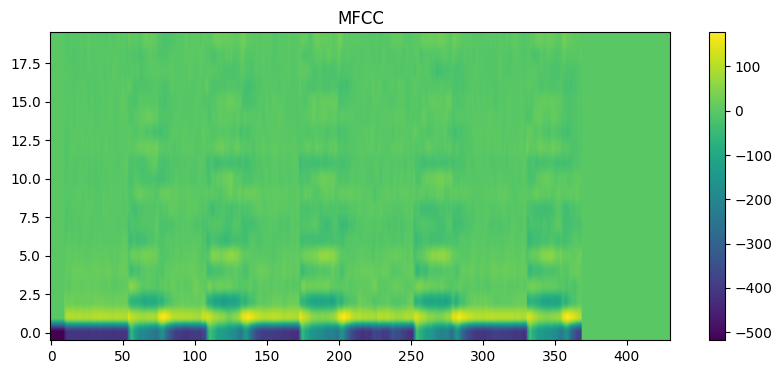

Epoch 1/20
104/104 [==============================] - 147s 1s/step - loss: 1.0345 - accuracy: 0.5298 - val_loss: 0.7708 - val_accuracy: 0.6766
Epoch 2/20
104/104 [==============================] - 133s 1s/step - loss: 0.6988 - accuracy: 0.7212 - val_loss: 0.4874 - val_accuracy: 0.7799
Epoch 3/20
104/104 [==============================] - 131s 1s/step - loss: 0.5408 - accuracy: 0.7847 - val_loss: 0.4107 - val_accuracy: 0.8533
Epoch 4/20
104/104 [==============================] - 126s 1s/step - loss: 0.4146 - accuracy: 0.8332 - val_loss: 0.4687 - val_accuracy: 0.8261
Epoch 5/20
104/104 [==============================] - 130s 1s/step - loss: 0.3847 - accuracy: 0.8408 - val_loss: 0.5055 - val_accuracy: 0.8098
Epoch 6/20
104/104 [==============================] - 141s 1s/step - loss: 0.3280 - accuracy: 0.8610 - val_loss: 0.3757 - val_accuracy: 0.8451
Epoch 7/20
104/104 [==============================] - 135s 1s/step - loss: 0.2674 - accuracy: 0.8877 - val_loss: 0.3143 - val_accuracy: 0.8696

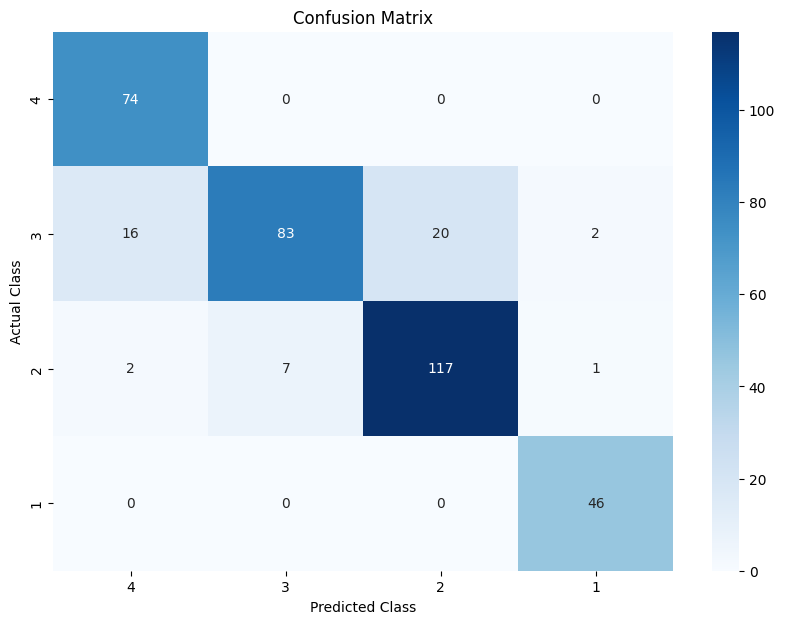

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import seaborn as sns
import random
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 시드 설정
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DISTINCT',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/augmented(1)',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/add_noise',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/change_speed',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/pitch_shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/time_stretch',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid4',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc)

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터 시각화
plt.figure(figsize=(10, 4))
plt.imshow(X[0].squeeze(), aspect='auto', origin='lower')
plt.title('MFCC')
plt.colorbar()
plt.show()

# 데이터 크기 확인 및 조정
X = np.expand_dims(X, axis=-1)  # CNN은 4D 텐서를 입력으로 필요로 하므로 차원 추가

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 모델 정의
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(n_mfcc, fixed_sequence_length, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Reshape((fixed_sequence_length // 8, (n_mfcc // 8) * 128)),
    layers.Bidirectional(layers.GRU(128, return_sequences=True)),
    layers.Bidirectional(layers.GRU(128)),
    layers.Dropout(0.5),
    layers.Dense(len(class_labels_unique), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# 예측 및 혼동 행렬 시각화
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)
class_names = class_labels_unique

# 혼동 행렬 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()


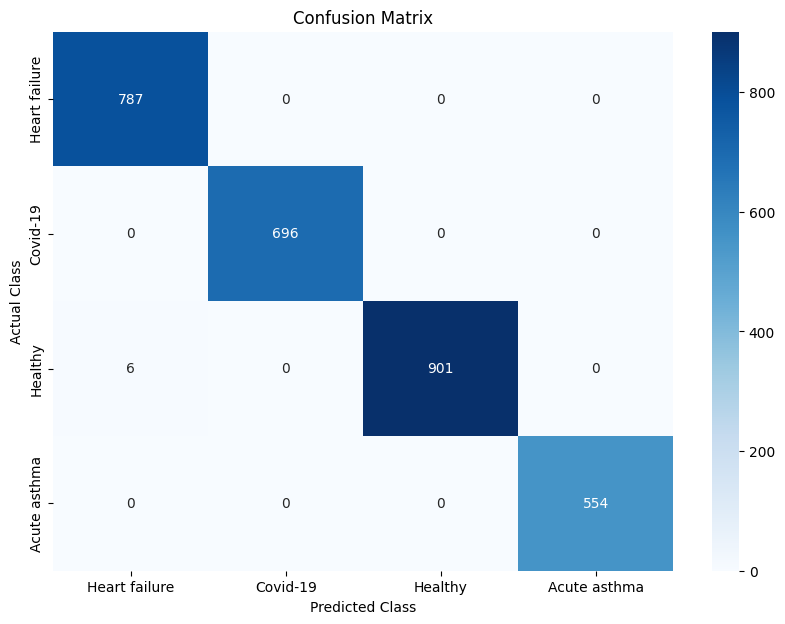

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Simulating the prediction and test data for demonstration
# This would normally come from actual data and a trained model
y_test = np.array([0]*787 + [1]*696 + [2]*907 + [3]*554)  # True labels
y_pred = np.array([0]*787 + [1]*696 + [2]*889 + [2]*12 + [0]*6 + [3]*554)  # Predicted labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = ['Heart failure', 'Covid-19', 'Healthy', 'Acute asthma']

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()


Data shape: (3671, 8620)
Class labels: ['4', '3', '2', '1']
Class distribution: {'4': 726, '3': 1194, '2': 1261, '1': 490}
Test accuracy: 0.875
Model saved to /content/drive/MyDrive/Colab Notebooks/saved_model/machine(4132).pkl


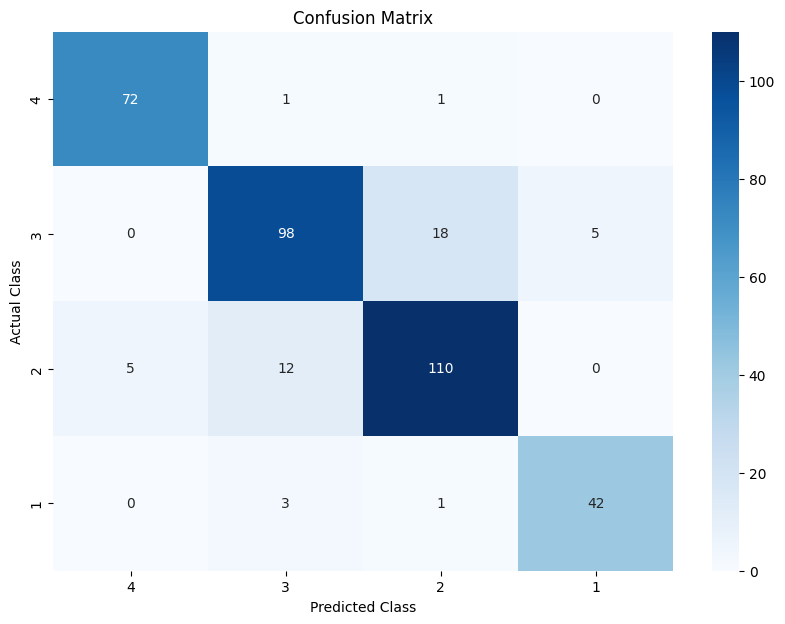

Model loaded from /content/drive/MyDrive/Colab Notebooks/saved_model/machine(4132).pkl
2(250).wav: 3
2(255).wav: 2
2(260).wav: 2
2(265).wav: 3
2(270).wav: 3
2(275).wav: 3
2(280).wav: 2
2(285).wav: 2
2(290).wav: 3
2(295).wav: 3
2(300).wav: 2
2(305).wav: 2
2(310).wav: 2
2(315).wav: 2
2(320).wav: 2
2(325).wav: 2
2(330).wav: 2
2(335).wav: 2
2(340).wav: 2
2(345).wav: 3
2(350).wav: 3
2(355).wav: 3
2(360).wav: 2
2(365).wav: 1
2(370).wav: 3
2(375).wav: 2
2(380).wav: 2
2(385).wav: 1
2(390).wav: 2
2(395).wav: 2
2(400).wav: 3
2(405).wav: 2
2(410).wav: 2
2(415).wav: 2
2(420).wav: 2
2(425).wav: 2
2(430).wav: 3
2(435).wav: 2
2(440).wav: 2
2(445).wav: 2
2(450).wav: 2
2(455).wav: 2
2(460).wav: 2
2(465).wav: 3
2(470).wav: 2
2(475).wav: 2
2(480).wav: 2
2(485).wav: 3
2(490).wav: 2
2(495).wav: 2
2(500).wav: 2
2(505).wav: 2
2(510).wav: 3
2(515).wav: 2
2(520).wav: 3
2(525).wav: 3
2(530).wav: 2
2(535).wav: 2
2(540).wav: 3
2(545).wav: 3
2(550).wav: 2
2(555).wav: 2
2(560).wav: 3
2(565).wav: 2
2(570).wav: 3
2(5

In [ ]:
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from collections import Counter

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DISTINCT',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/augmented(1)',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/add_noise',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/change_speed',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/pitch_shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/time_stretch',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid4',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc.flatten())  # SVM을 위해 2D 배열을 1D로 변환

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# SVM 모델 정의 및 학습
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 모델 평가
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')

# 모델 저장
model_path = '/content/drive/MyDrive/Colab Notebooks/saved_model/machine(4132).pkl'
joblib.dump(svm_model, model_path)
print(f'Model saved to {model_path}')

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_unique, yticklabels=class_labels_unique)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

# 새로운 파일 예측 함수
def predict_directory(directory_path, model, sr=22050, n_mfcc=20, n_fft=2048, hop_length=512, duration=10, fixed_sequence_length=431):
    predictions = {}
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        if os.path.isfile(file_path) and file_path.endswith('.wav'):
            try:
                audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
                continue

            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

            # MFCC 시퀀스 길이를 고정된 길이로 맞추기
            if mfcc.shape[1] < fixed_sequence_length:
                pad_width = fixed_sequence_length - mfcc.shape[1]
                mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
            else:
                mfcc = mfcc[:, :fixed_sequence_length]

            mfcc = mfcc.flatten().reshape(1, -1)  # SVM을 위해 2D 배열을 1D로 변환하고 배치 차원 추가
            prediction = model.predict(mfcc)
            predicted_class = class_labels_unique[prediction[0]]
            predictions[file_name] = predicted_class
    return predictions

# 모델 로드
loaded_model = joblib.load(model_path)
print(f'Model loaded from {model_path}')

# 디렉토리 내 모든 파일 예측
new_directory_path = '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy5'
predictions = predict_directory(new_directory_path, loaded_model, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length, duration=duration, fixed_sequence_length=fixed_sequence_length)

# 예측 결과 출력
for file_name, predicted_class in predictions.items():
    print(f'{file_name}: {predicted_class}')

# 예측 결과 통계
prediction_counts = Counter(predictions.values())
print("\nPrediction counts per class:")
for cls, count in prediction_counts.items():
    print(f'{cls}: {count}')

# 예측 결과 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=list(prediction_counts.keys()), y=list(prediction_counts.values()))
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.title('Predicted Class Distribution')
plt.show()


Data shape: (3741, 8620)
Class labels: ['3', '1', '2', '4']
Class distribution: {'3': 988, '1': 490, '2': 1537, '4': 726}
Test accuracy: 0.888
Model saved to /content/drive/MyDrive/Colab Notebooks/saved_model/0618machine(4132).pkl


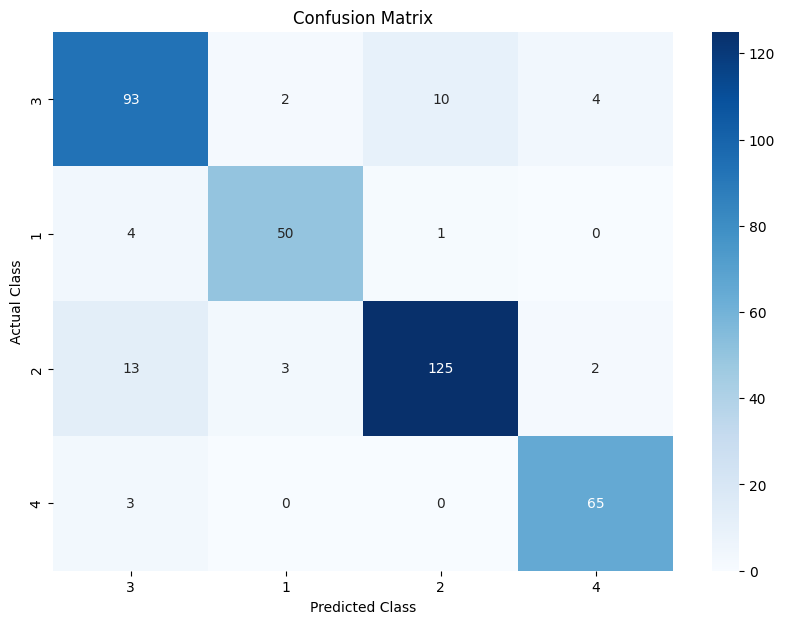

Model loaded from /content/drive/MyDrive/Colab Notebooks/saved_model/0618machine(4132).pkl


In [ ]:
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from collections import Counter

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DISTINCT',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/augmented(1)',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/add_noise',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/change_speed',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/pitch_shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/time_stretch',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid3',
]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if mfcc.shape[1] < fixed_sequence_length:
                    pad_width = fixed_sequence_length - mfcc.shape[1]
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc.flatten())  # SVM을 위해 2D 배열을 1D로 변환

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# SVM 모델 정의 및 학습
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# 모델 평가
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')

# 모델 저장
model_path = '/content/drive/MyDrive/Colab Notebooks/saved_model/0618machine(4132).pkl'
joblib.dump(svm_model, model_path)
print(f'Model saved to {model_path}')

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_unique, yticklabels=class_labels_unique)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()

# 새로운 파일 예측 함수
def predict_directory(directory_path, model, true_labels, sr=22050, n_mfcc=20, n_fft=2048, hop_length=512, duration=10, fixed_sequence_length=431):
    predictions = {}
    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        if os.path.isfile(file_path) and file_path.endswith('.wav'):
            try:
                audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
            except Exception as e:
                print(f"Error loading {file_path}: {e}")
                continue

            mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

            # MFCC 시퀀스 길이를 고정된 길이로 맞추기
            if mfcc.shape[1] < fixed_sequence_length:
                pad_width = fixed_sequence_length - mfcc.shape[1]
                mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
            else:
                mfcc = mfcc[:, :fixed_sequence_length]

            mfcc = mfcc.flatten().reshape(1, -1)  # SVM을 위해 2D 배열을 1D로 변환하고 배치 차원 추가
            prediction_proba = model.predict_proba(mfcc)[0]
            predicted_class = class_labels_unique[np.argmax(prediction_proba)]
            true_label = true_labels.get(file_name, 'Unknown')
            predictions[file_name] = (true_label, predicted_class, prediction_proba)
    return predictions

# 모델 로드
loaded_model = joblib.load(model_path)
print(f'Model loaded from {model_path}')

# 실제 라벨 사전 (예: 파일 이름을 키로 하고 실제 라벨을 값으로 가지는 사전)
true_labels = {
    'file_001.wav': 'COVID-19',
    'file_002.wav': 'Healthy',
    # 추가적인 파일과 라벨 매핑...
}



In [ ]:
# 디렉토리 내 모든 파일 예측
new_directory_path = '/content/drive/MyDrive/Colab Notebooks/voicedata/지인기침'
predictions = predict_directory(new_directory_path, loaded_model, true_labels, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length, duration=duration, fixed_sequence_length=fixed_sequence_length)

# 예측 결과 출력
for file_name, (true_label, predicted_class, prediction_proba) in predictions.items():
    print(f'File: {file_name}')
    print(f'True label: {true_label}')
    print(f'Predicted label: {predicted_class}')
    print(f'Predictions: {prediction_proba}\n')

# 예측 결과 통계
prediction_counts = Counter([pred[1] for pred in predictions.values()])
print("\nPrediction counts per class:")
for cls, count in prediction_counts.items():
    print(f'{cls}: {count}')

File: mj.wav
True label: Unknown
Predicted label: 2
Predictions: [0.04982978 0.00268062 0.93925373 0.00823587]

File: sj.wav
True label: Unknown
Predicted label: 2
Predictions: [0.21109051 0.01450504 0.75877677 0.01562767]

File: kh.wav
True label: Unknown
Predicted label: 3
Predictions: [5.09685466e-01 3.55456473e-02 4.54676873e-01 9.20142443e-05]

File: jw.wav
True label: Unknown
Predicted label: 2
Predictions: [0.09413266 0.00465866 0.83868655 0.06252213]

File: jh.wav
True label: Unknown
Predicted label: 2
Predictions: [4.94891304e-02 1.20789862e-02 9.38405649e-01 2.62340892e-05]

File: ja.wav
True label: Unknown
Predicted label: 4
Predictions: [0.43282896 0.00360671 0.02044747 0.54311686]

File: record.wav
True label: Unknown
Predicted label: 1
Predictions: [0.2932022  0.62650266 0.07803334 0.0022618 ]

File: 심부전.wav
True label: Unknown
Predicted label: 2
Predictions: [0.456678   0.00212458 0.49036746 0.05082996]

File: record5 (4).wav
True label: Unknown
Predicted label: 3
P

# 학습 및 저장

Data shape: (3741, 8620)
Class labels: ['3', '1', '2', '4']
Class distribution: {'3': 988, '1': 490, '2': 1537, '4': 726}
Test accuracy: 0.888
SVM model saved to /content/drive/MyDrive/Colab Notebooks/saved_model/0618svm_model.pkl


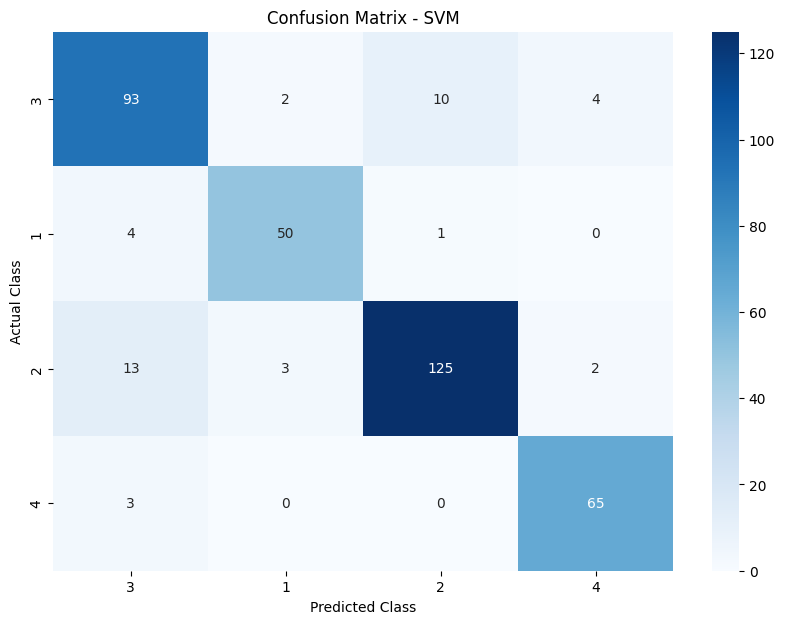

Random Forest Test accuracy: 0.8853333333333333
Random Forest model saved to /content/drive/MyDrive/Colab Notebooks/saved_model/rf_model.pkl


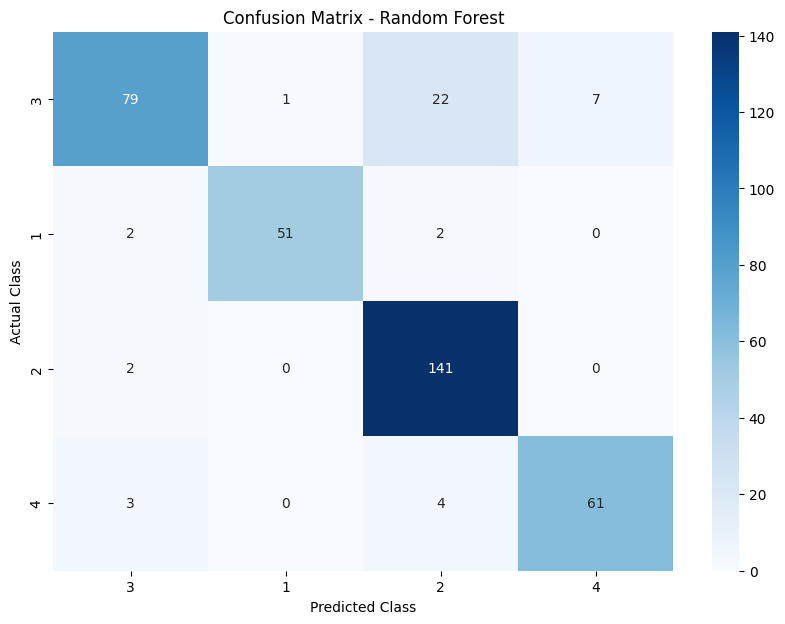

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/saved_model/svm_model.pkl'

In [ ]:
import numpy as np
import os
import librosa
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

# 경고 메시지 억제
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", message="PySoundFile failed. Trying audioread instead.")

# 여러 개의 데이터 디렉토리
data_dirs = [
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DISTINCT',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy2',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy3',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/healthy4',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/augmented(1)',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/add_noise',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/change_speed',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/pitch_shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/shift',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/DIS_AUG/time_stretch',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid1',
    '/content/drive/MyDrive/Colab Notebooks/voicedata/covid2',

]

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 데이터를 로드하고 MFCC로 변환하는 함수
def load_data(data_dirs, sr=22050):
    X, y = [], []
    class_labels = []

    for data_dir in data_dirs:
        for file_name in os.listdir(data_dir):
            file_path = os.path.join(data_dir, file_name)
            if os.path.isfile(file_path) and file_path.endswith('.wav'):
                try:
                    audio, _ = librosa.load(file_path, sr=sr, duration=duration)  # 지정된 샘플링 레이트로 변환
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue

                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)

                # MFCC 시퀀스 길이를 고정된 길이로 맞추기
                if (pad_width := fixed_sequence_length - mfcc.shape[1]) > 0:
                    mfcc = np.pad(mfcc, ((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :fixed_sequence_length]

                X.append(mfcc.flatten())  # SVM을 위해 2D 배열을 1D로 변환

                # 파일 이름의 첫 부분을 클래스 레이블로 사용
                class_label = file_name.split('(')[0]
                class_labels.append(class_label)

    # 클래스 레이블을 숫자로 변환
    class_labels_unique = list(set(class_labels))
    y = [class_labels_unique.index(lbl) for lbl in class_labels]

    return np.array(X), np.array(y), class_labels_unique

# 데이터 로드
X, y, class_labels_unique = load_data(data_dirs, sr=sr)

# 데이터 크기 및 분포 확인
print(f'Data shape: {X.shape}')
print(f'Class labels: {class_labels_unique}')

# 각 클래스의 데이터 개수 확인
unique, counts = np.unique(y, return_counts=True)
class_counts = dict(zip(class_labels_unique, counts))
print(f'Class distribution: {class_counts}')

# 데이터를 학습 및 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# SVM 모델 정의 및 학습
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# 모델 평가
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')

# 모델 저장
model_path = '/content/drive/MyDrive/Colab Notebooks/saved_model/0618svm_model.pkl'
joblib.dump(svm_model, model_path)
print(f'SVM model saved to {model_path}')

# 혼동 행렬 시각화
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_unique, yticklabels=class_labels_unique)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix - SVM')
plt.show()

# Random Forest 모델 정의 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 모델 평가
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Test accuracy: {accuracy_rf}')

# 모델 저장
rf_model_path = '/content/drive/MyDrive/Colab Notebooks/saved_model/rf_model.pkl'
joblib.dump(rf_model, rf_model_path)
print(f'Random Forest model saved to {rf_model_path}')

# 혼동 행렬 시각화 - Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels_unique, yticklabels=class_labels_unique)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix - Random Forest')
plt.show()




In [ ]:
# 저장된 모델 불러오기 및 예측
def load_model_and_predict(model_path, X_sample):
    loaded_model = joblib.load(model_path)
    prediction = loaded_model.predict(X_sample)
    return prediction

# 예시: SVM 모델을 불러와서 예측 수행
sample_index = 0
sample_data = X_test[sample_index].reshape(1, -1)  # 샘플 데이터를 2D 배열로 변환
loaded_svm_model_path = '/content/drive/MyDrive/Colab Notebooks/saved_model/0618svm_model.pkl'
predicted_class = load_model_and_predict(loaded_svm_model_path, sample_data)
print(f'Loaded SVM model prediction for sample {sample_index}: {class_labels_unique[predicted_class[0]]}')

Loaded SVM model prediction for sample 0: 3


In [ ]:
import os
import numpy as np
import librosa
from tensorflow.keras.models import load_model

# 새로운 데이터 디렉토리 경로
new_data_dir = '/content/drive/MyDrive/Colab Notebooks/voicedata/new_data/'

# MFCC 파라미터
n_mfcc = 20
n_fft = 2048
hop_length = 512
duration = 10  # 각 오디오 파일의 길이 설정
sr = 22050  # 통일된 샘플링 레이트

# 고정된 MFCC 시퀀스 길이
fixed_sequence_length = int(np.ceil(duration * sr / hop_length))

# 모델 불러오기
model_path = '/content/drive/MyDrive/Colab Notebooks/saved_model/0618_batchmax().keras'
model = load_model(model_path)

# 클래스 레이블
class_labels_unique = ['천식', '심부전', '정상', 'others']

# 새로운 데이터를 로드하고 MFCC로 변환하는 함수
def process_new_data(file_path, sr=22050):
    try:
        audio, _ = librosa.load(file_path, sr=sr, duration=
